<a href="https://colab.research.google.com/github/Raymay3/MAT422/blob/main/HW%203.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Section 3.4. Logistic Regression**

***Logistic Regression and Gradient Descent***

Logistic regression is used to model the probability of a binary outcome based on a set of input features. In this demonstration, we'll implement the basic logistic regression algorithm using **gradient descent** to minimize the **cross-entropy loss**.

Here, we will demonstrate key concepts from the logistic regression section, including:
1. Logistic function and its properties.
2. Cross-entropy loss.
3. Gradient computation and gradient descent updates.
4. Stochastic gradient descent.

**Example 1: Logistic Function and Sigmoid**

The logistic (or sigmoid) function is used to convert real-valued inputs into probabilities between 0 and 1. It is defined as:

\
\begin{aligned}
\sigma(t) = \frac{1}{1 + e^{-t}}
\end{aligned}

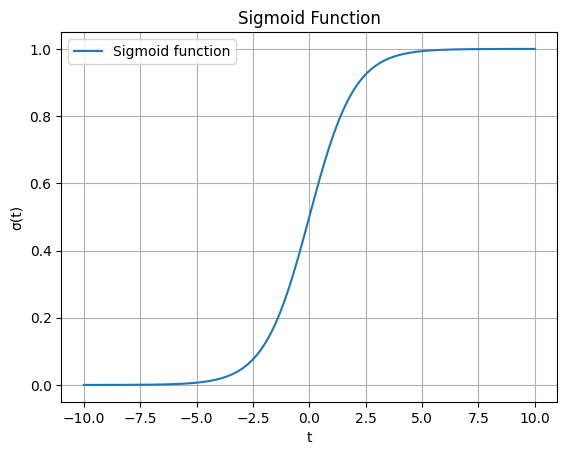

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

# Generate input data
t = np.linspace(-10, 10, 100)

# Plot sigmoid function
plt.plot(t, sigmoid(t), label="Sigmoid function")
plt.title("Sigmoid Function")
plt.xlabel("t")
plt.ylabel("σ(t)")
plt.grid(True)
plt.legend()
plt.show()

**Explanation:**

The sigmoid function transforms any real-valued number into the range (0, 1). This function is key in logistic regression, where we interpret the output as a probability that a given input belongs to the positive class (1).

---

**Example 2: Cross-Entropy Loss for Logistic Regression**

The cross-entropy loss is a measure of how well a logistic regression model is performing. Given $A \in \mathbb{R}^{n \times d}$ as the input features and $b \in \{0, 1\}^n$ as the labels, the cross-entropy loss for logistic regression is given by:

\
\begin{aligned}
L(x; A, b) = - \frac{1}{n} \sum_{i=1}^{n} \left[ b_i \log(\sigma(\alpha_i^T x)) + (1 - b_i) \log(1 - \sigma(\alpha_i^T x)) \right]
\end{aligned}

In [2]:
# Define the cross-entropy loss
def cross_entropy_loss(X, y, theta):
    predictions = sigmoid(X @ theta)
    return -1 / len(y) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

# Example dataset
X = np.array([[1, 2], [1, 3], [1, 4], [1, 5]])  # Features (including bias term)
y = np.array([0, 0, 1, 1])  # Labels
theta = np.array([0.1, 0.2])  # Initial parameters

# Compute the loss
loss = cross_entropy_loss(X, y, theta)
print(f"Cross-Entropy Loss: {loss:.4f}")

Cross-Entropy Loss: 0.6764


**Explanation:**

The cross-entropy loss measures how different the predicted probabilities are from the actual binary labels. A smaller loss indicates a better model fit.

---

**Example 3: Gradient Descent for Logistic Regression**

To minimize the cross-entropy loss, we use **gradient descent**, where the update rule is:

\
\begin{aligned}
x_{k+1} = x_k + \beta \frac{1}{n} \sum_{i=1}^{n} \left( b_i - \sigma(\alpha_i^T x_k) \right) \alpha_i
\end{aligned}

In [3]:
# Define the gradient of the cross-entropy loss
def gradient(X, y, theta):
    predictions = sigmoid(X @ theta)
    return X.T @ (predictions - y) / len(y)

# Define the gradient descent algorithm
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    for i in range(num_iterations):
        grad = gradient(X, y, theta)
        theta -= learning_rate * grad

        # Compute and print loss every 100 iterations
        if i % 100 == 0:
            loss = cross_entropy_loss(X, y, theta)
            print(f"Iteration {i}: Loss = {loss:.4f}")

    return theta

# Hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Perform gradient descent
theta_optimal = gradient_descent(X, y, theta, learning_rate, num_iterations)
print("Optimal parameters:", theta_optimal)

Iteration 0: Loss = 0.6694
Iteration 100: Loss = 0.5314
Iteration 200: Loss = 0.4423
Iteration 300: Loss = 0.3805
Iteration 400: Loss = 0.3358
Iteration 500: Loss = 0.3021
Iteration 600: Loss = 0.2758
Iteration 700: Loss = 0.2547
Iteration 800: Loss = 0.2373
Iteration 900: Loss = 0.2227
Optimal parameters: [-5.96125271  1.77316577]


**Explanation:**

The gradient descent algorithm iteratively updates the model parameters (theta) by subtracting the gradient of the loss function. Over many iterations, the parameters converge to the values that minimize the loss.

---

**Example 4: Stochastic Gradient Descent (SGD)**

In stochastic gradient descent (SGD), we update the parameters using a randomly selected data point at each iteration, rather than using the entire dataset as in batch gradient descent. The update rule for SGD is:

\
\begin{aligned}
x_{k+1} = x_k + \beta \left( b_I - \sigma(\alpha_I^T x_k) \right) \alpha_I
\end{aligned}

In [4]:
# Define the stochastic gradient descent algorithm
def stochastic_gradient_descent(X, y, theta, learning_rate, num_iterations):
    for i in range(num_iterations):
        idx = np.random.randint(0, len(y))  # Randomly pick a data point
        X_i = X[idx, :].reshape(1, -1)
        y_i = y[idx].reshape(-1)

        grad = gradient(X_i, y_i, theta)
        theta -= learning_rate * grad

        # Compute and print loss every 100 iterations
        if i % 100 == 0:
            loss = cross_entropy_loss(X, y, theta)
            print(f"Iteration {i}: Loss = {loss:.4f}")

    return theta

# Perform stochastic gradient descent
theta_optimal_sgd = stochastic_gradient_descent(X, y, theta, learning_rate, num_iterations)
print("Optimal parameters (SGD):", theta_optimal_sgd)

Iteration 0: Loss = 0.2109
Iteration 100: Loss = 0.2021
Iteration 200: Loss = 0.1891
Iteration 300: Loss = 0.1844
Iteration 400: Loss = 0.2022
Iteration 500: Loss = 0.1719
Iteration 600: Loss = 0.1959
Iteration 700: Loss = 0.1534
Iteration 800: Loss = 0.1499
Iteration 900: Loss = 0.1499
Optimal parameters (SGD): [-8.64296035  2.38166682]


**Explanation:**

SGD typically converges faster than batch gradient descent for large datasets because it updates the parameters more frequently, but it may produce noisier updates due to the random selection of data points.